In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, integrate

In [14]:
def comp_trap_for_sqrt(lower_b, upper_b):
    m_values = [10, 20, 40, 80, 160]
    a, b = lower_b, upper_b
    
    x = symbols('x')
    f = sqrt(x)
    Intf = integrate(f, (x, a, b))
    
    err = np.zeros(len(m_values))
    h_val = np.zeros(len(m_values))
    
    for j in range(len(m_values)):
        m = m_values[j]
        h = (b-a)/m
        x_vals =np.linspace(a, b, m+1)
        
        F = np.trapz(np.sqrt(x_vals), dx=h)
        
        err[j] =np.abs(Intf - F)
        h_val[j] = h
        
        print(f'h = {h:.4f}, F = {F:.6f}, Error = {err[j]:.1e}', end="")
        if j > 0:
            ratio = err[j - 1] / err[j]
            print(f', ratio = {ratio:.2f}, order = {np.log(ratio):.2f}')
        else:
            print()
    
    # To estimate order-p by using |E_h(f)| <= C(h^p) 
    # we run regression for ln(E_h(f)) = ln(C) + pln(h) whwere x = ln(h) and y = ln(E_h(f))
    coefficients = np.polyfit(np.log(h_val), np.log(err), 1)
    order_p, constant_c  = coefficients[0], coefficients[1]
    
    return err, h_val, order_p, constant_c


h = 0.0900, F = 0.644865, Error = 7.2e-04
h = 0.0450, F = 0.645403, Error = 1.8e-04, ratio = 3.96, order = 1.38
h = 0.0225, F = 0.645539, Error = 4.6e-05, ratio = 3.99, order = 1.38
h = 0.0112, F = 0.645573, Error = 1.1e-05, ratio = 4.00, order = 1.39
h = 0.0056, F = 0.645582, Error = 2.9e-06, ratio = 4.00, order = 1.39
Order p: 1.9958


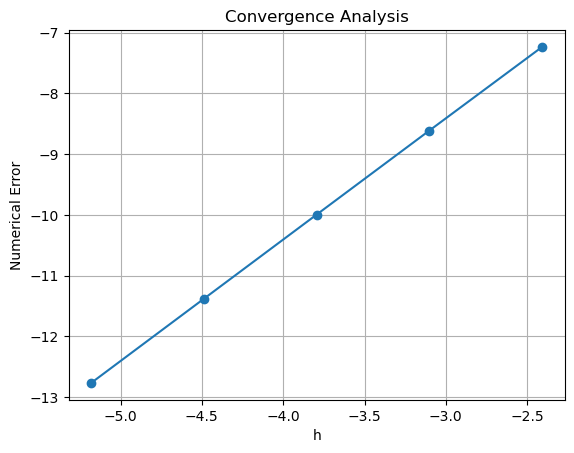

In [20]:
err1, h_val1, order_p1, constant_c1 = comp_trap_for_sqrt(0.1, 1)
plt.figure()
plt.plot(np.log(h_val1), np.log(err1), '-o')
plt.title('Convergence Analysis')
plt.xlabel('h')
plt.ylabel('Numerical Error')
plt.grid(True)

print(f'Order p: {order_p1:.4f}')

h = 0.1000, F = 0.660509, Error = 6.2e-03
h = 0.0500, F = 0.664447, Error = 2.2e-03, ratio = 2.77, order = 1.02
h = 0.0250, F = 0.665871, Error = 8.0e-04, ratio = 2.79, order = 1.03
h = 0.0125, F = 0.666383, Error = 2.8e-04, ratio = 2.80, order = 1.03
h = 0.0063, F = 0.666566, Error = 1.0e-04, ratio = 2.81, order = 1.03
Order p: 1.4824


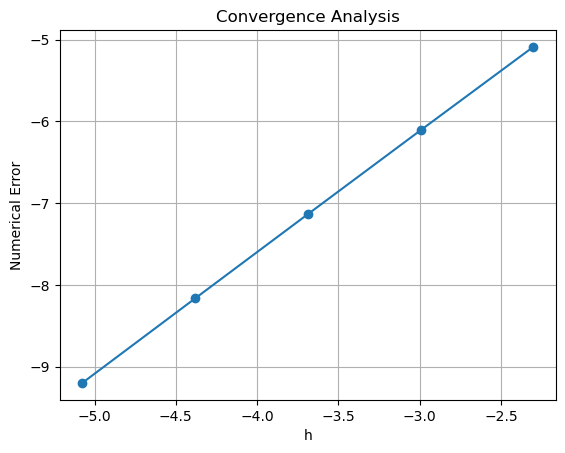

In [21]:
err2, h_val2, order_p2, constant_c2 = comp_trap_for_sqrt(0, 1)
plt.figure()
plt.plot(np.log(h_val2), np.log(err2), '-o')
plt.title('Convergence Analysis')
plt.xlabel('h')
plt.ylabel('Numerical Error')
plt.grid(True)

print(f'Order p: {order_p2:.4f}')


Integrating f using trapezoid rule with range [0.10, 1.00]

h = 0.0900, F = 0.644865, Error = 7.2e-04
h = 0.0450, F = 0.645403, Error = 1.8e-04, ratio = 3.96, order = 1.38
h = 0.0225, F = 0.645539, Error = 4.6e-05, ratio = 3.99, order = 1.38
h = 0.0112, F = 0.645573, Error = 1.1e-05, ratio = 4.00, order = 1.39
h = 0.0056, F = 0.645582, Error = 2.9e-06, ratio = 4.00, order = 1.39
Slope: 1.9958
Intercept: -2.4265


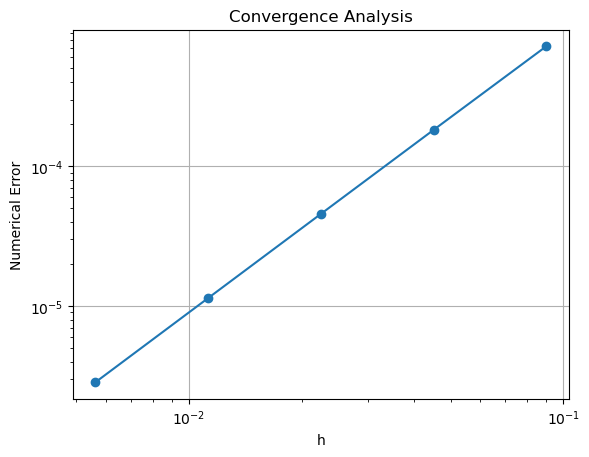

In [13]:
m_values = [10, 20, 40, 80, 160]
a = 0.1
b = 1

x = symbols('x')
f = sqrt(x)
Intf = integrate(f, (x, a, b))



# Integrate over specified resolutions
numResolutions = len(m_values)
err = np.zeros(numResolutions)

method = 'trapezoid'
print(f'\nIntegrating f using {method} rule with range [{a:.2f}, {b:.2f}]\n')

# Integrate over specified resolutions
h_values = np.zeros(numResolutions)  # Initialize array to store h values

for j in range(numResolutions):
    m = m_values[j]
    h = (b - a) / m
    x_vals = np.linspace(a, b, m + 1)

    F = np.trapz(np.sqrt(x_vals), dx=h)

    err[j] = np.abs(Intf - F)
    h_values[j] = h
    print(f'h = {h:.4f}, F = {F:.6f}, Error = {err[j]:.1e}', end="")
    if j > 0:
        ratio = err[j - 1] / err[j]
        print(f', ratio = {ratio:.2f}, order = {np.log(ratio):.2f}')
    else:
        print()

# Plotting
plt.figure()
plt.loglog(h_values, err, '-o')
plt.title('Convergence Analysis')
plt.xlabel('h')
plt.ylabel('Numerical Error')
plt.grid(True)

log_h = np.log(h_values)
log_err = np.log(err)
coefficients = np.polyfit(log_h, log_err, 1)
slope = coefficients[0]
intercept = coefficients[1]

print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.4f}')

plt.show()
